**Hands-on Activity 9.2 Customized Visualizations using Seaborn**

**Instructions:**

Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

**Resources:**

Download the following datasets: fb_stock_prices_2018.csv Download fb_stock_prices_2018.csv, earthquakes-1.csvDownload earthquakes-1.csv
Procedures:

**9.4 Introduction to Seaborn**

**9.5 Formatting Plots**

**9.6 Customizing Visualizations**

**Data Analysis:**


**Provide comments on output from the procedures.
Supplementary Activity:**

**Using the CSV files provided and what we have learned so far in this module complete the following exercises:**

Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.
Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)
Fill in the area between the bounds in the plot from exercise #2.
Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.
Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
Disappointing user growth announced after close on July 25, 2018
Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
FTC launches investigation on March 20, 2018
Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.
Summary/Conclusion:

**Provide a summary of your learnings and the conclusion for this activity.**

**Start of 9.4**

**Introduction to Seaborn**

About the Data
In this notebook, we will be working with 2 datasets:
Facebook's stock price throughout 2018 (obtained using the stock_analysis package)

Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv(
 'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('earthquakes-1.csv')


**Categorical data**

A 7.5 magnitude earthquake on September 28, 2018 near Palu, Indonesia caused a devastating tsunami afterwards. Let's take a look at some visualizations to understand
what magTypes are used in Indonesia, the range of magnitudes there, and how many of the earthquakes are accompanied by a tsunami.

In [ ]:
quakes.assign(
 time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
 "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


**stripplot()**

The stripplot() function helps us visualize categorical data on one axis and numerical data on the other. We also now have the option of coloring our points using a
column of our data (with the hue parameter). Using a strip plot, we can see points for each earthquake that was measured with a given magType and what its magnitude
was; however, it isn't too easy to see density of the points due to overlap:


<Axes: xlabel='magType', ylabel='mag'>

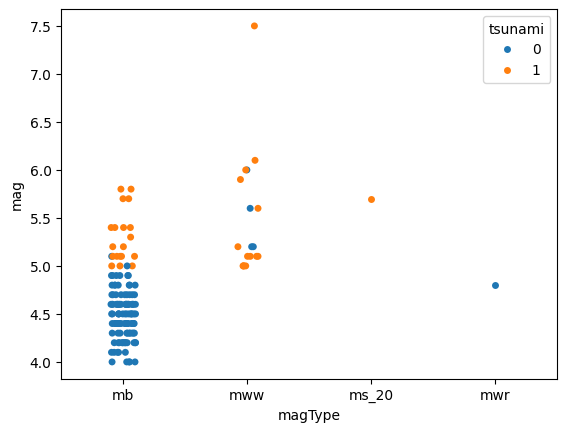

In [ ]:
sns.stripplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)


**swarmplot()**
The bee swarm plot helps address this issue be keeping the points from overlapping. Notice how many more points we can see for the blue section of the mb magType :

<Axes: xlabel='magType', ylabel='mag'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


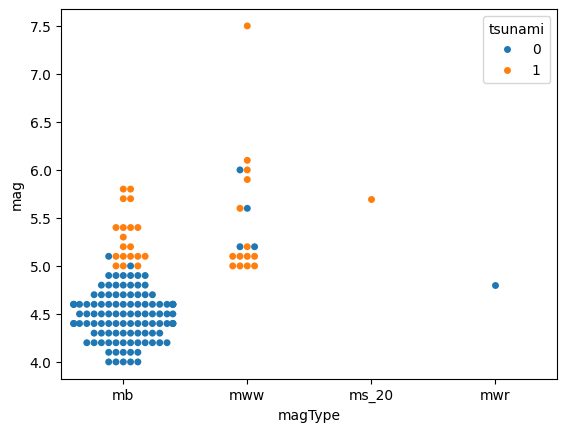

In [ ]:
sns.swarmplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)


**Correlations and Heatmaps**

heatmap()
An easier way to create correlation matrix is to use seaborn :


<Axes: >

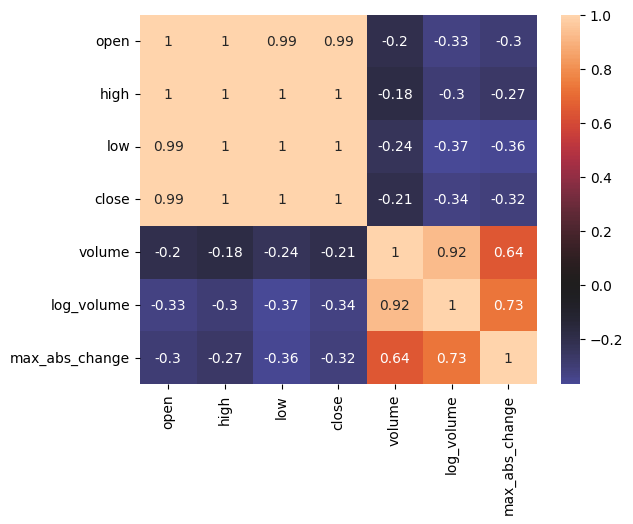

In [ ]:
sns.heatmap(
 fb.sort_index().assign(
 log_volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).corr(),

 annot=True, center=0
)

**pairplot()**

The pair plot is seaborn's answer to the scatter matrix we saw in the pandas subplotting notebook:

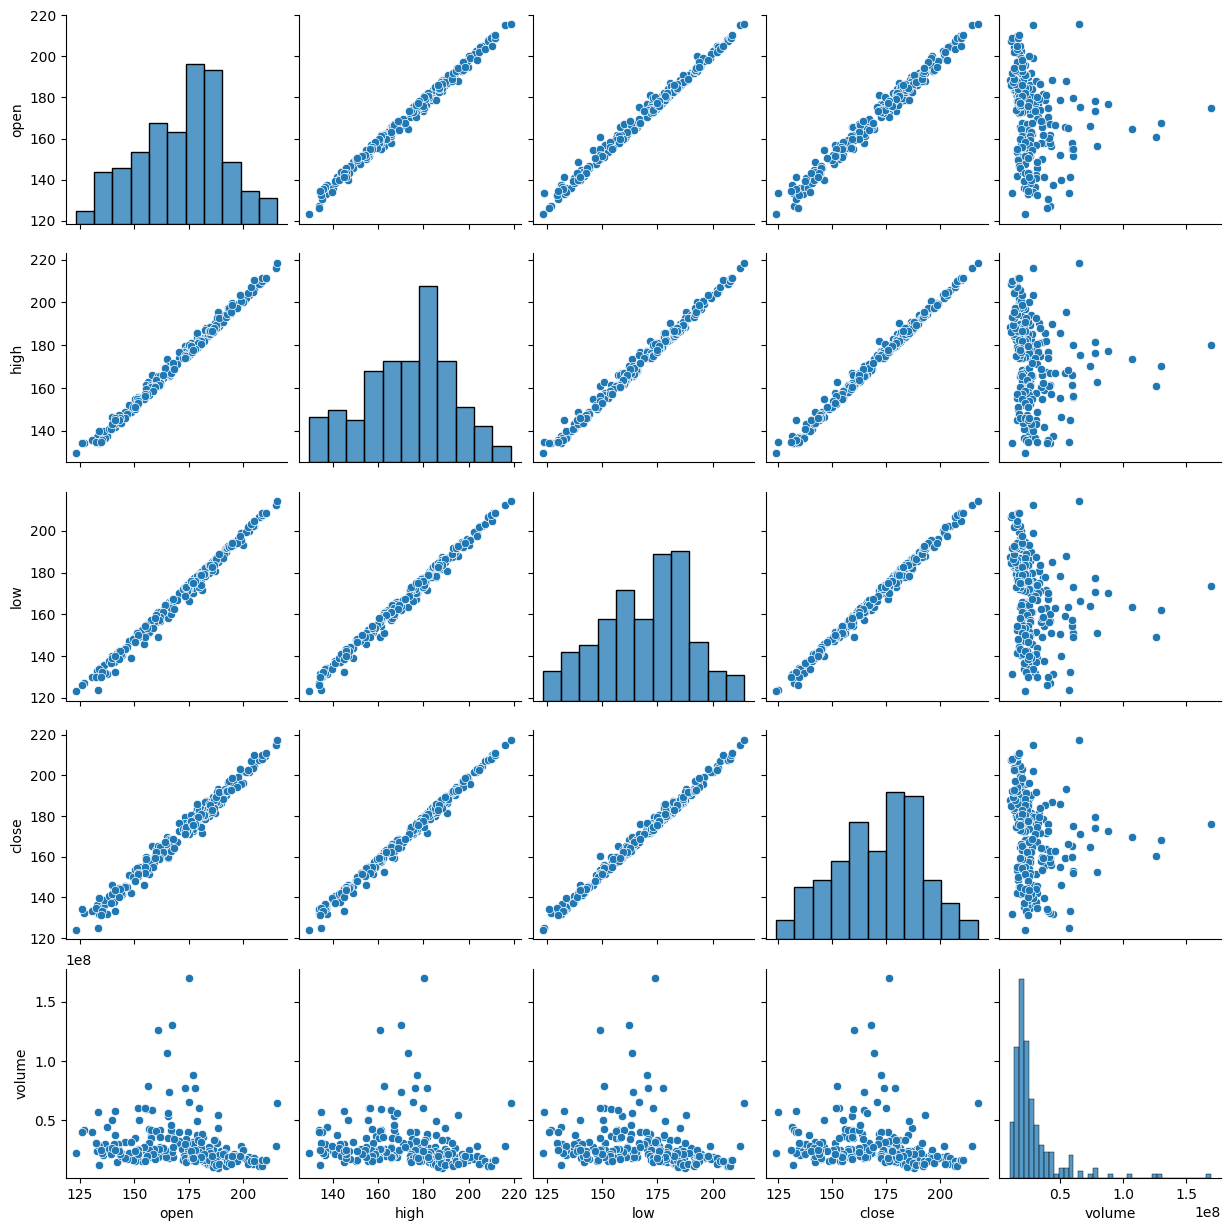

In [ ]:
sns.pairplot(fb)

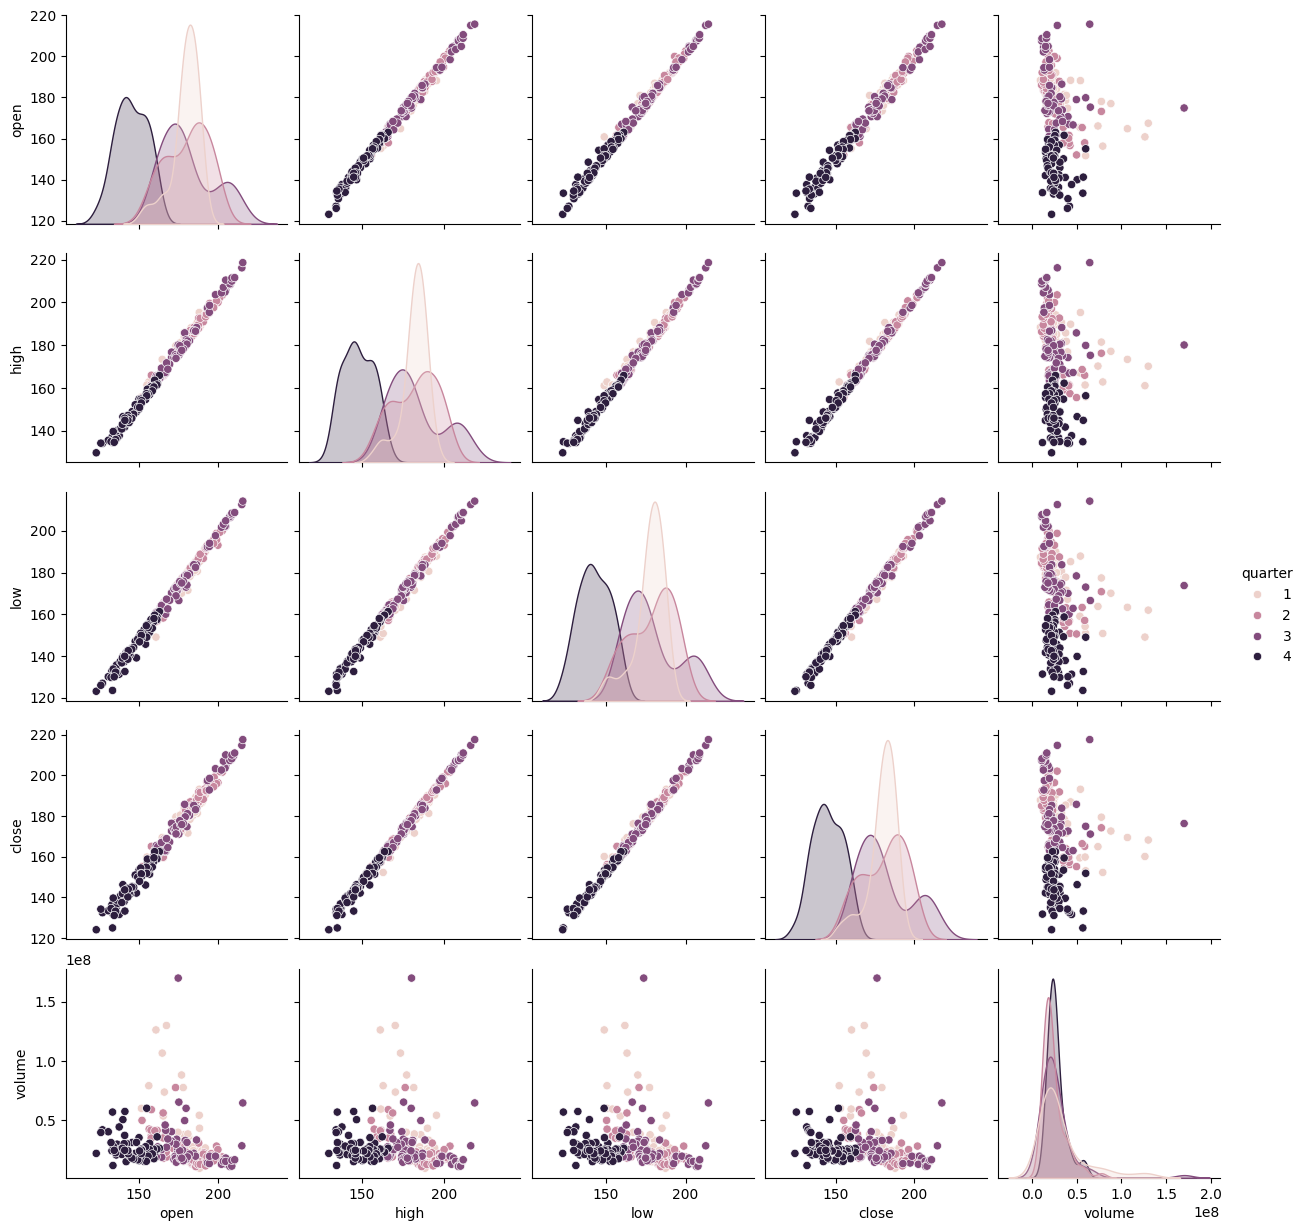

In [ ]:
sns.pairplot(
 fb.assign(quarter=lambda x: x.index.quarter),
 diag_kind='kde',
 hue='quarter'
)

**jointplot()**

The joint plot allows us to visualize the relationship between two variables, like a scatter plot. However, we get the added benefit of being able to visualize their distributions at
the same time (as a histogram or KDE). The default options give us a scatter plot in the center and histograms on the sides:


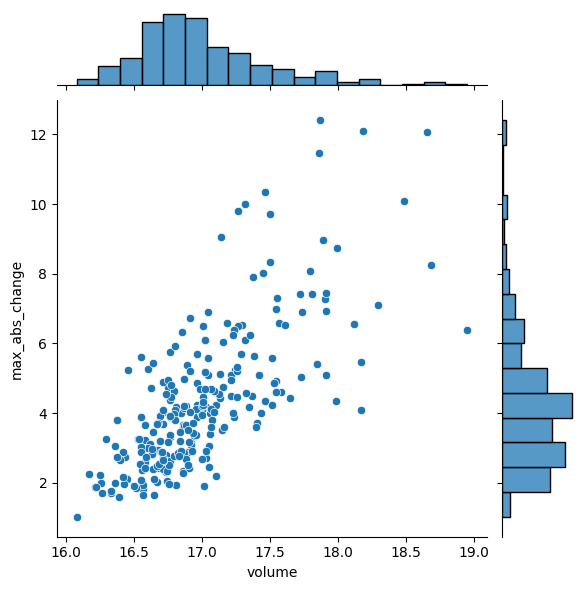

In [ ]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)


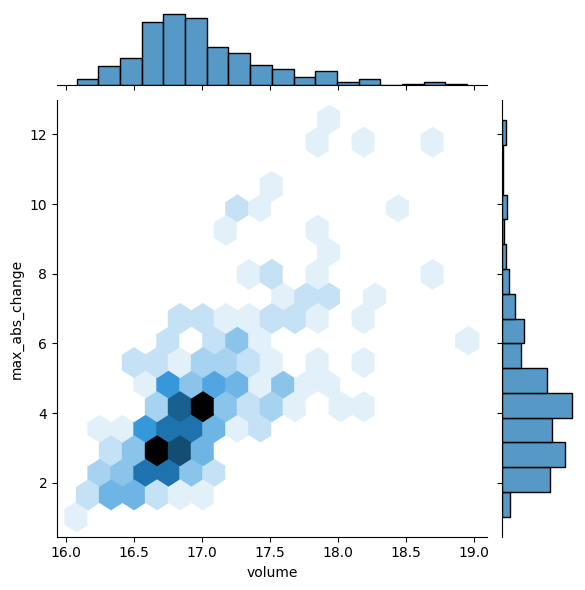

In [ ]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='hex',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)


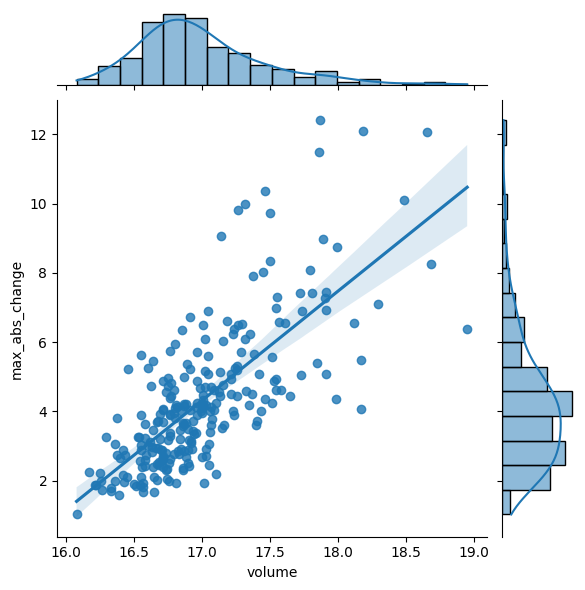

In [ ]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='reg',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

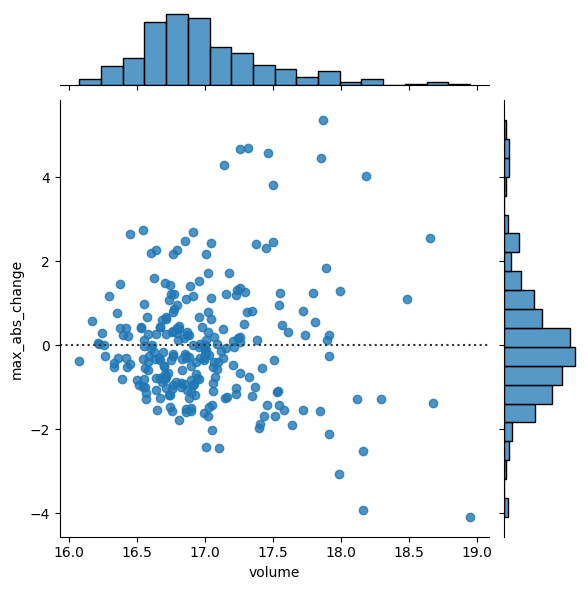

In [ ]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='resid',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

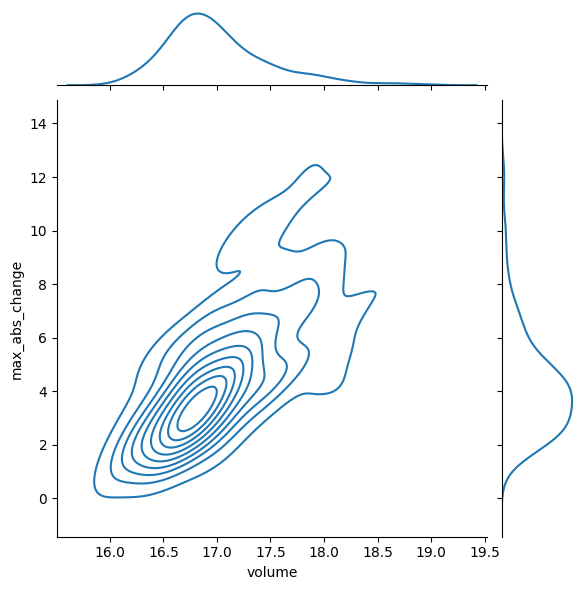

In [ ]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='kde',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)


**Regression plots**

We are going to use seaborn to visualize a linear regression between the log of the volume traded in Facebook stock and the maximum absolute daily change (daily high
stock price - daily low stock price). To do so, we first need to isolate this data:


In [ ]:
_reg_data = fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).iloc[:,-2:]


In [ ]:
import itertools

**itertools** gives us efficient iterators. Iterators are objects that we loop over, exhausting them. This is an iterator from itertools ; notice how the second loop doesn't
do anything:

In [ ]:
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
 print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
 print(f'-->{i}')


-->I'm an iterator
This printed once because the iterator has been exhausted


In [ ]:
iterable = list(itertools.repeat("I'm an iterable", 1))
for i in iterable:
 print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
 print(f'-->{i}')


-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


**The reg_resid_plots()** function from the reg_resid_plot.py module in this folder uses regplot() and residplot() from seaborn along with itertools to
plot the regression and residuals side-by-side:

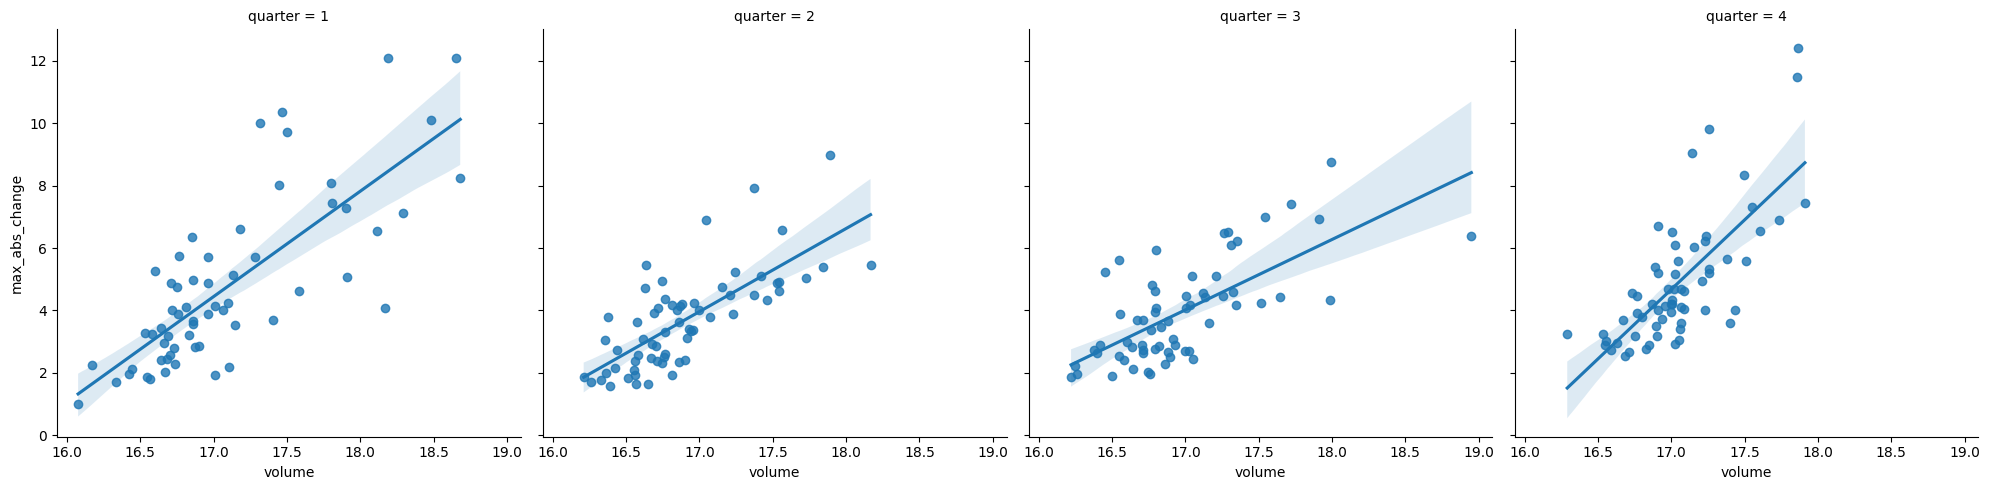

In [ ]:
sns.lmplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low,
 quarter=lambda x: x.index.quarter
 ),
 col='quarter'
)

**Distributions**

Seaborn provides some new plot types for visualizing distributions in additional to its own versions of the plot types we discussed in chapter 5 (in this notebook).

**boxenplot()**

The boxenplot is a box plot that shows additional quantiles:


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

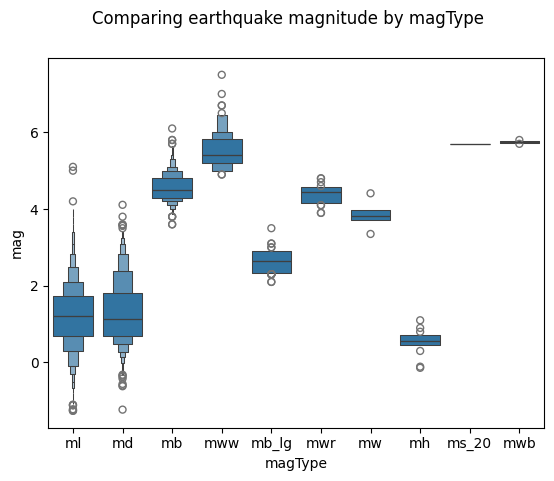

In [ ]:
sns.boxenplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')


**violinplot()**

Box plots lose some information about the distribution, so we can use violin plots which combine box plots and KDEs:

<ipython-input-38-bd4e17637bf6>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

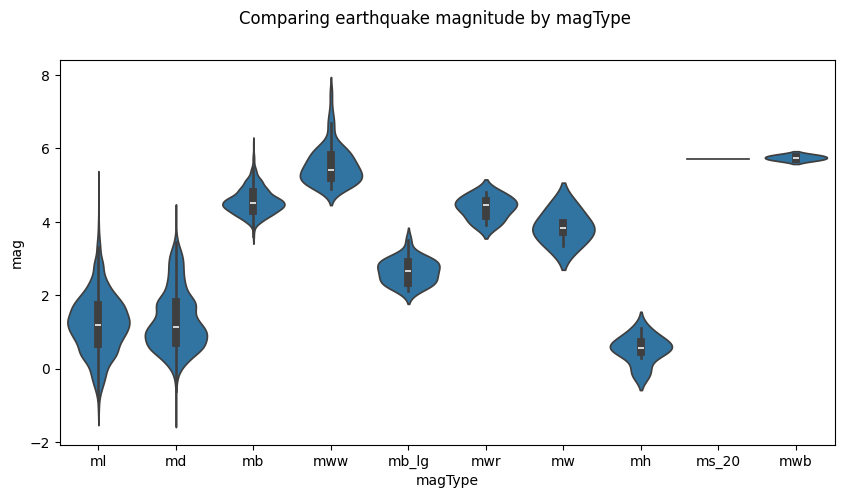

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']],
 ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')


**Faceting**

We can create subplots across subsets of our data by faceting. First, we create a FacetGrid specifying how to layout the plots (which categorical column goes along the
rows and which one along the columns). Then, we call the map() method of the FacetGrid and pass in the plotting function we want to use (along with any additional
arguments).
Let's make histograms showing the distribution of earthquake magnitude in California, Alaska, and Hawaii faceted by magType and parse_placed :


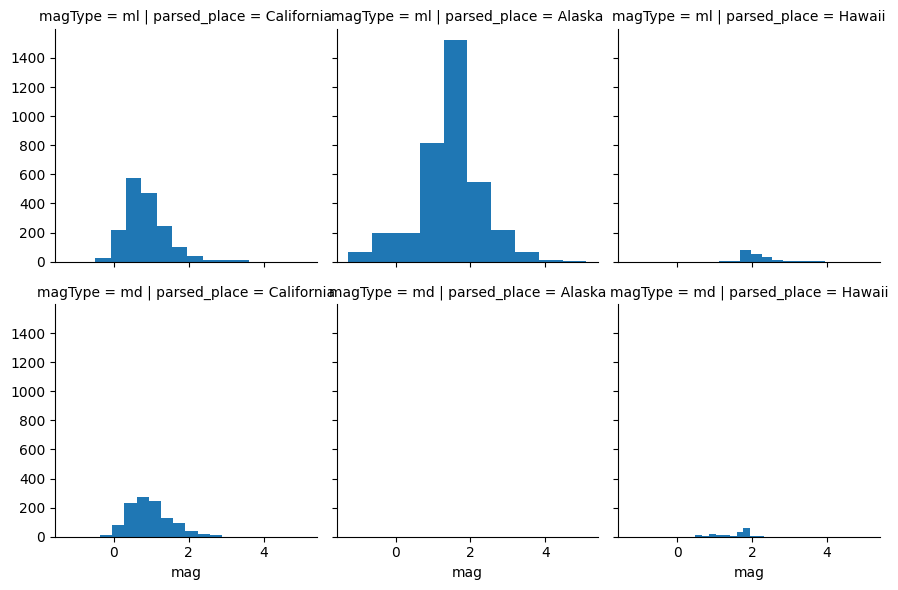

In [ ]:
g = sns.FacetGrid(
 quakes[
 (quakes.parsed_place.isin([
 'California', 'Alaska', 'Hawaii'
 ]))\
 & (quakes.magType.isin(['ml', 'md']))
 ],
 row='magType',
 col='parsed_place'
)
g = g.map(plt.hist, 'mag')

**Start of HOA 9.5**

Formatting Plots

About the Data

In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the stock_analysis package).


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
 'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

**Titles and Axis Labels**

plt.suptitle() adds a title to plots and subplots

plt.title() adds a title to a single plot. Note if you use subplots, it will
only put the title on the last subplot, so you will need to use plt.suptitle()

plt.xlabel() labels the x-axis

plt.ylabel() labels the y-axis


Text(0, 0.5, 'price ($)')

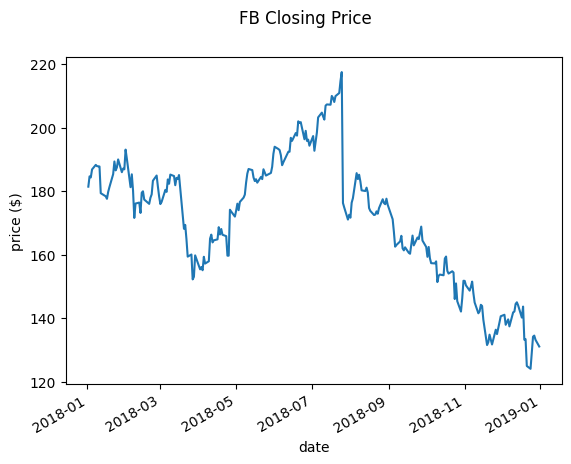

In [ ]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')


**plt.suptitle() vs. plt.title()**

Check out what happens when we call plt.title() with subplots:


Text(0, 0.5, 'price ($)')

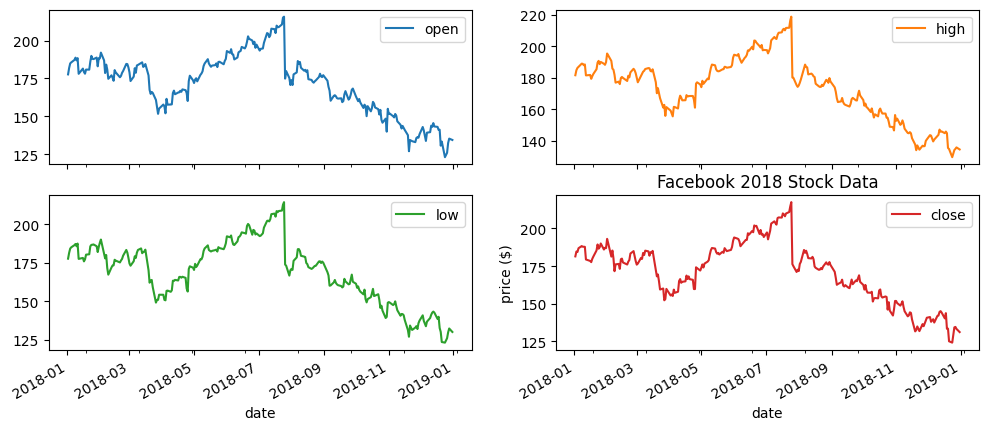

In [ ]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

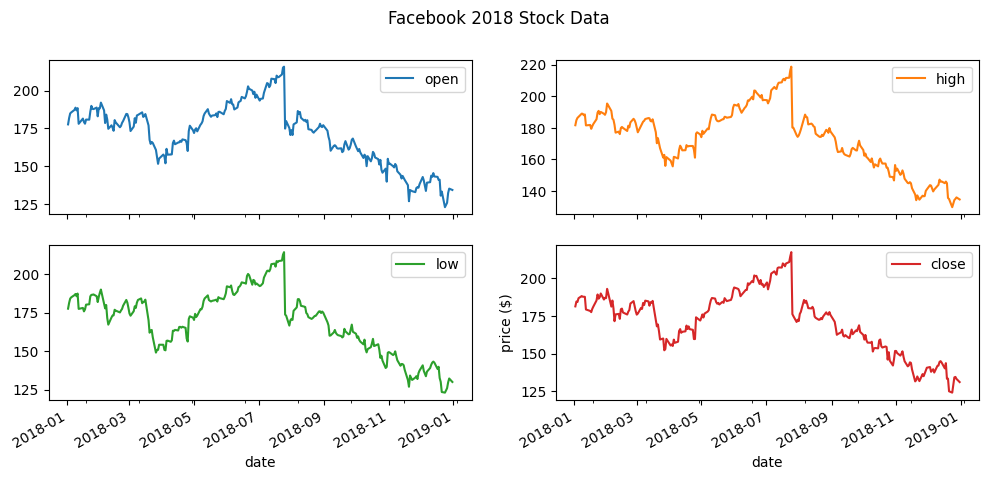

In [ ]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')


**Legends**

plt.legend() adds a legend to the plot. We can specify where to place it with the loc parameter:

Text(0, 0.5, 'price ($)')

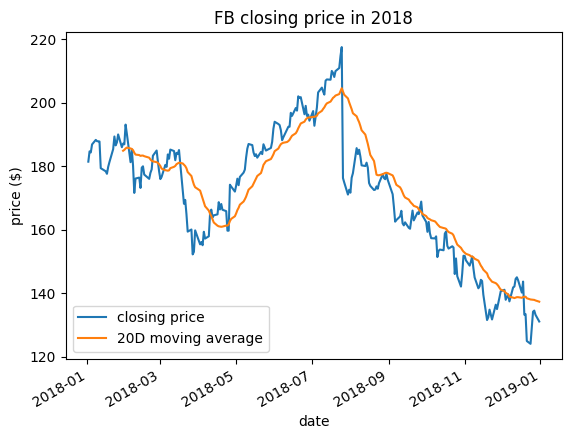

In [ ]:
fb.assign(
 ma=lambda x: x.close.rolling(20).mean()
).plot(
 y=['close', 'ma'],
 title='FB closing price in 2018',
 label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')


**Formatting Axes**

**Specifying axis limits**

plt.xlim() and plt.ylim() can be used to specify the minimum and maximum values for the axis. Passing None will have matplotlib determine the limit.


Text(0, 0.5, 'price ($)')

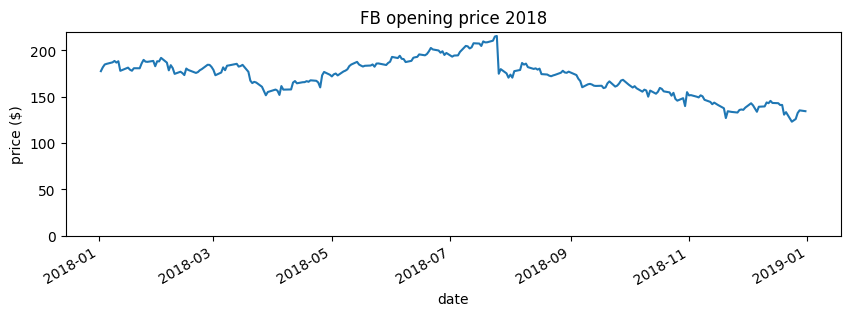

In [ ]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')


**Formatting the Axis Ticks**

We can use plt.xticks() and plt.yticks() to provide tick labels and specify, which ticks to show. Here, we show every other month:


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (6).

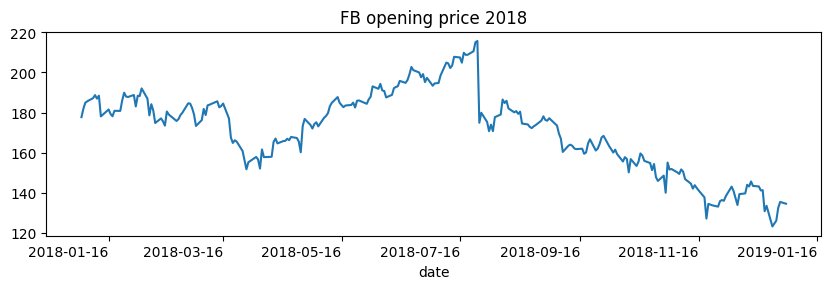

In [ ]:
import calendar
fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs + 15 , calendar.month_name[1::2])
plt.ylabel('price ($)')

**Using ticker**

PercentFormatter

We can use ticker.PercentFormatter and specify the denominator ( xmax ) to use when calculating the percentages. This gets passed to the
set_major_formatter() method of the xaxis or yaxis on the Axes .



Text(0, 0.5, 'percent of highest price ($218.62)')

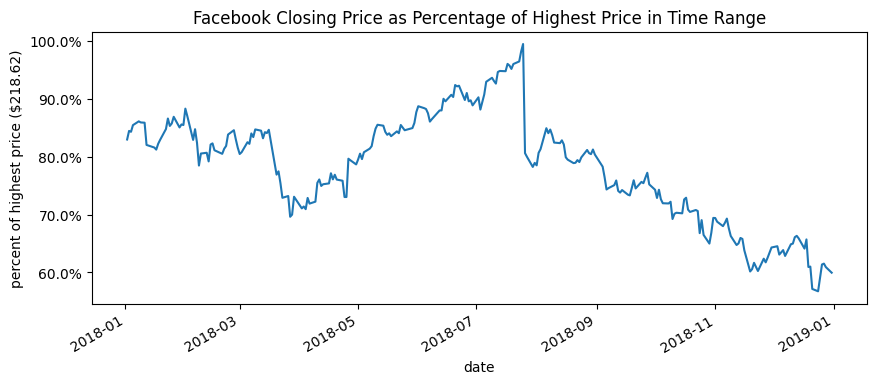

In [ ]:
import matplotlib.ticker as ticker
ax = fb.close.plot(
 figsize=(10, 4),
 title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
 ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
 fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')


**MultipleLocator**

Say we have the following data. The points only take on integer values for x .

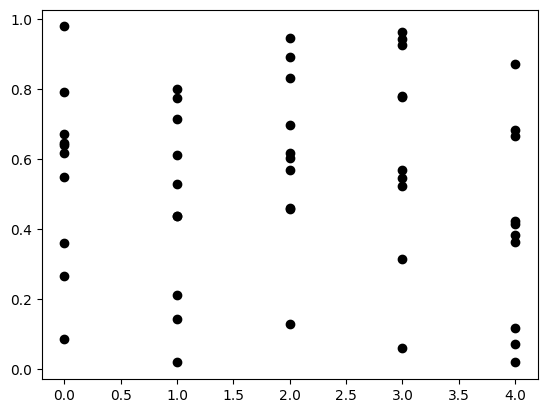

In [ ]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')


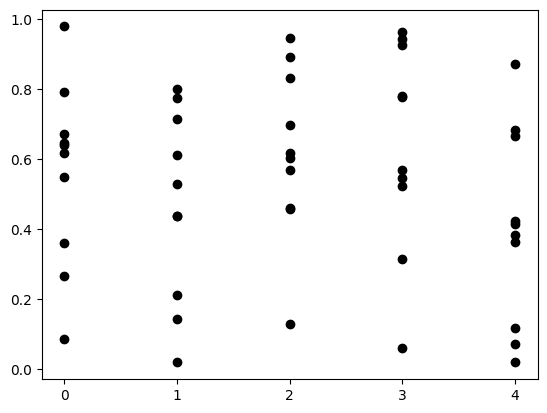

In [ ]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
 ticker.MultipleLocator(base=1)
)

**Start of HOA 9.6**

**pandas.plotting subpackage**

Pandas provides some extra plotting functions for a few select plot types.
About the Data
In this notebook, we will be working with Facebook's stock price throughout 2018 (obtained using the stock_analysis package).


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
 'fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

**Scatter matrix**

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

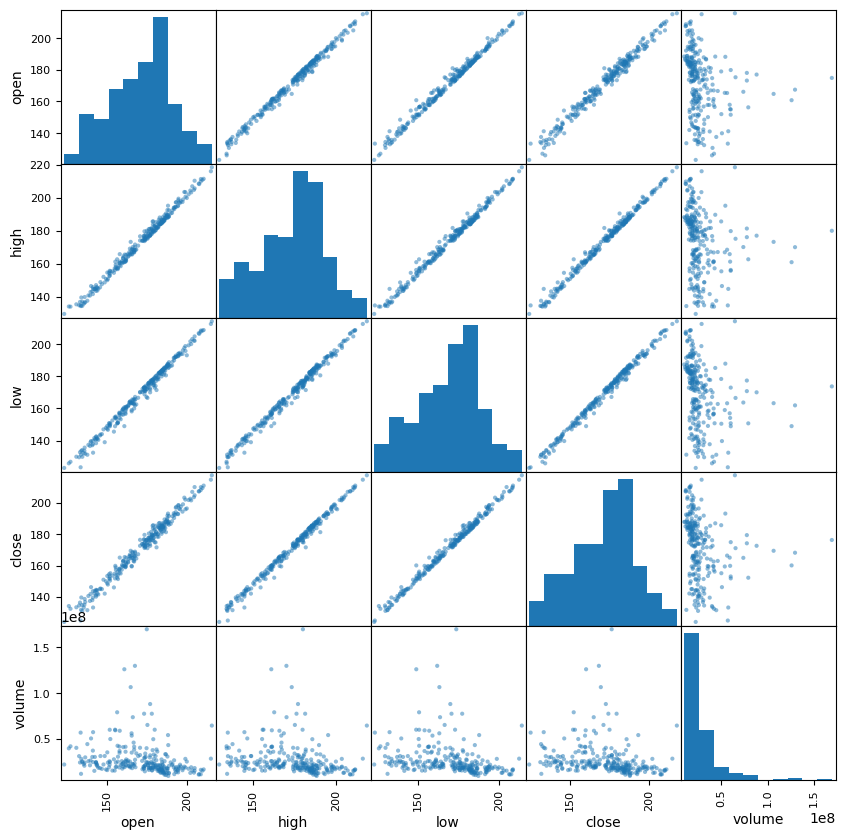

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

Changing the diagonal from histograms to KDE:

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

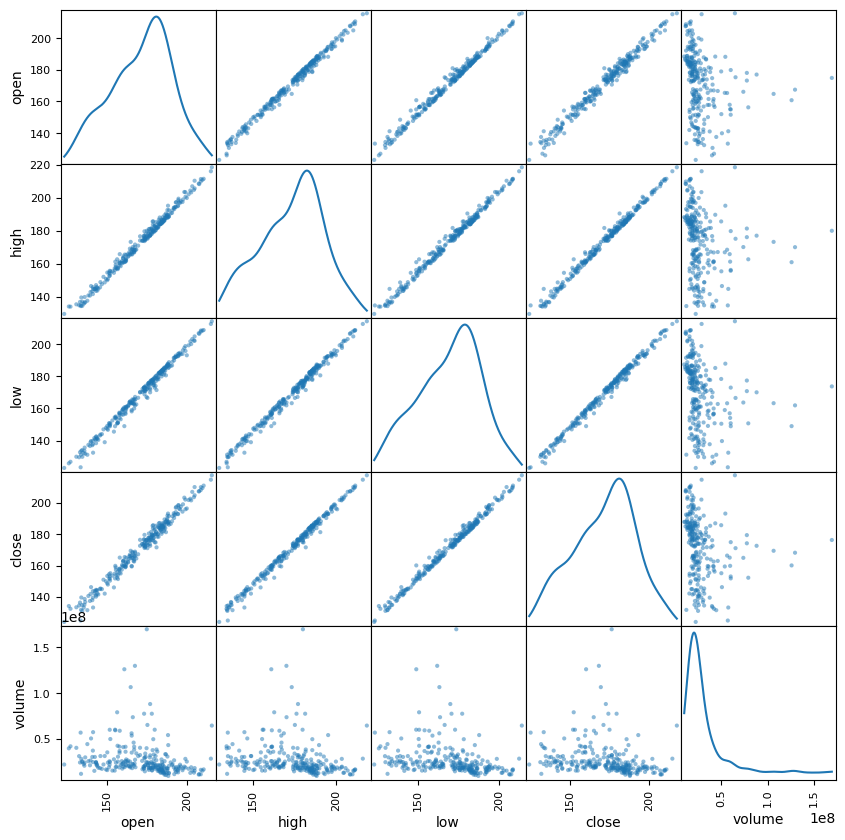

In [ ]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

**Lag plot**

Lag plots let us see how the variable correlations with past observations of itself. Random data has no pattern:

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

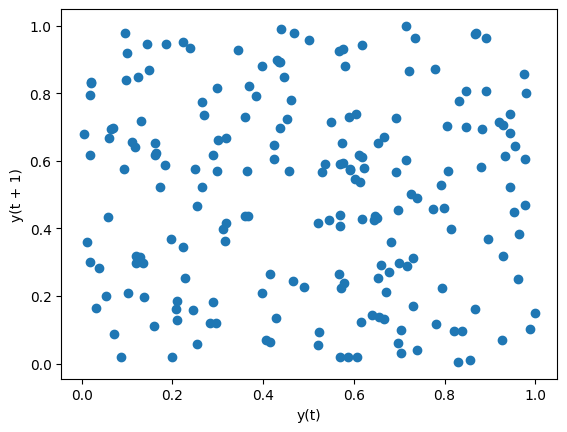

In [ ]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto-correlated:

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

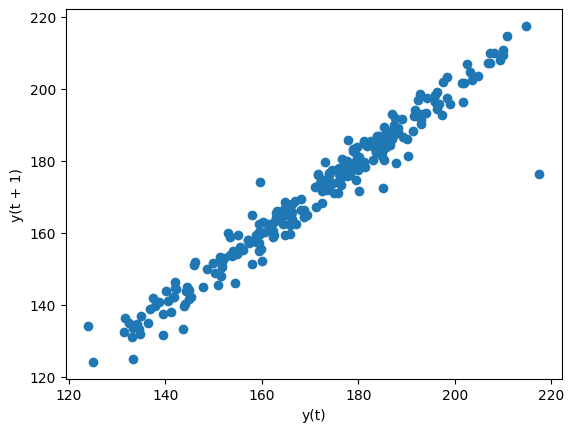

In [ ]:
lag_plot(fb.close)

The default lag is 1, but we can alter this with the lag parameter. Let's look at a 5 day lag (a week of trading activity):


<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

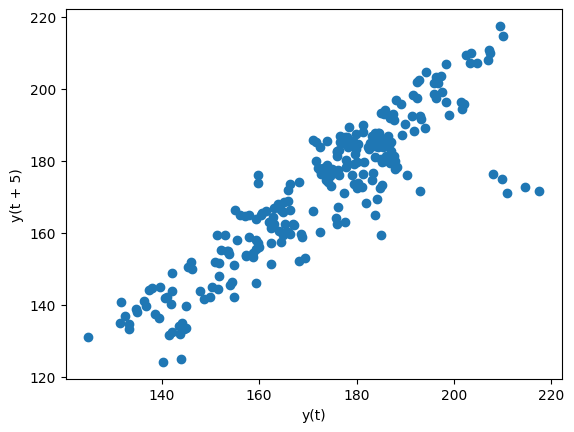

In [ ]:
lag_plot(fb.close, lag=5)

**Autocorrelation plots**

We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the
bounds below):


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

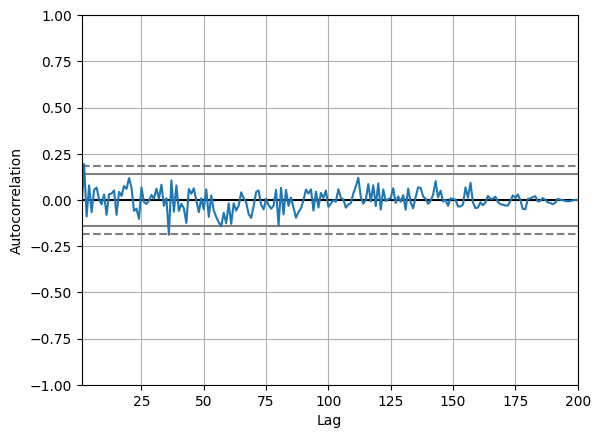

In [ ]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

Stock data, on the other hand, does have significant autocorrelation:

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

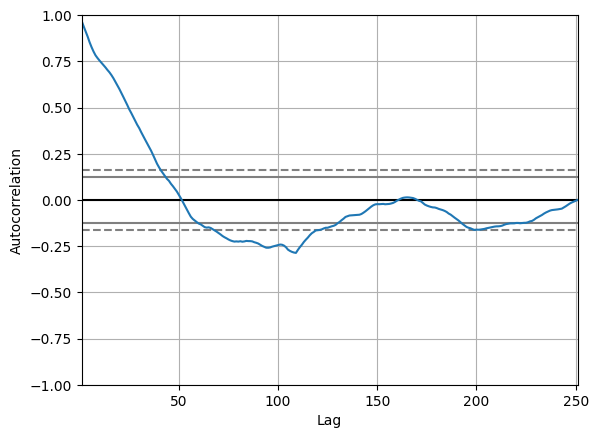

In [ ]:
autocorrelation_plot(fb.close)

**Bootstrap plot**

This plot helps us understand the uncertainty in our summary statistics:


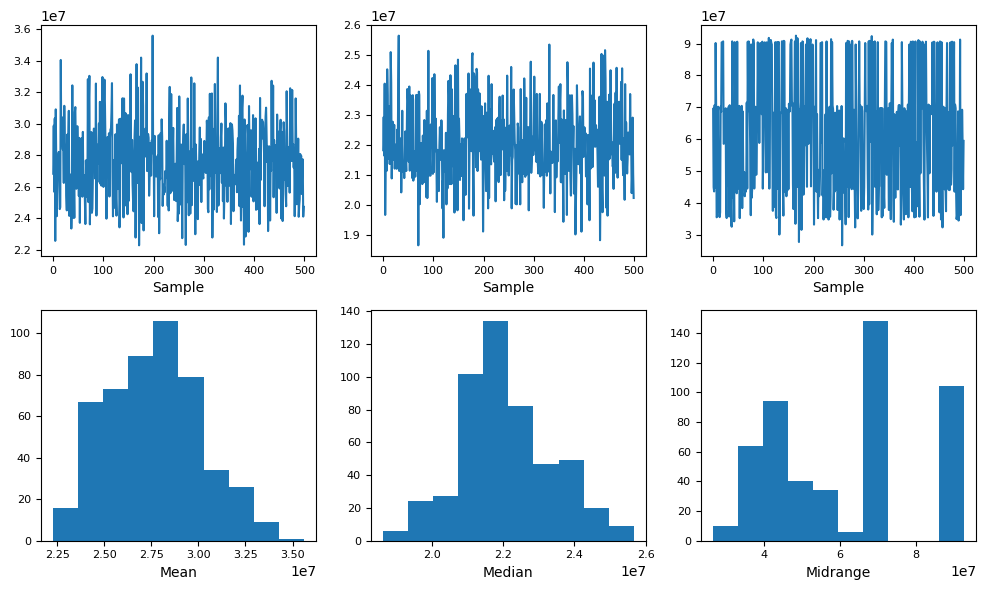

In [ ]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

**Start of supplementary Activity**

In [ ]:
# Finish the following exercises using the supplied CSV files and the knowledge we have gained thus far in this module:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, "Correlation Heatmap (magType='mb')")

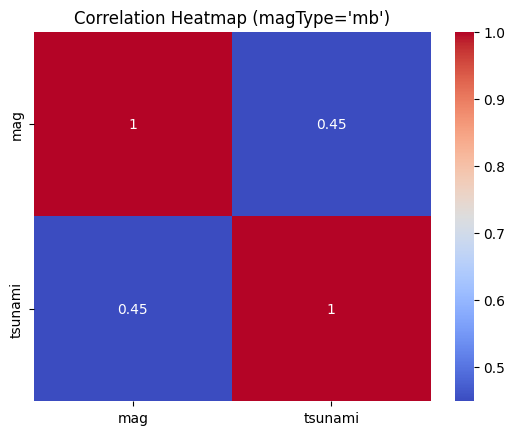

In [ ]:
# 1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

# Load  data
df = pd.read_csv("earthquakes-1.csv")

# Filter 'mb'
mb_df = df[df['magType'] == 'mb']

# Compute correlations
corr = mb_df[['mag', 'tsunami']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (magType='mb')")

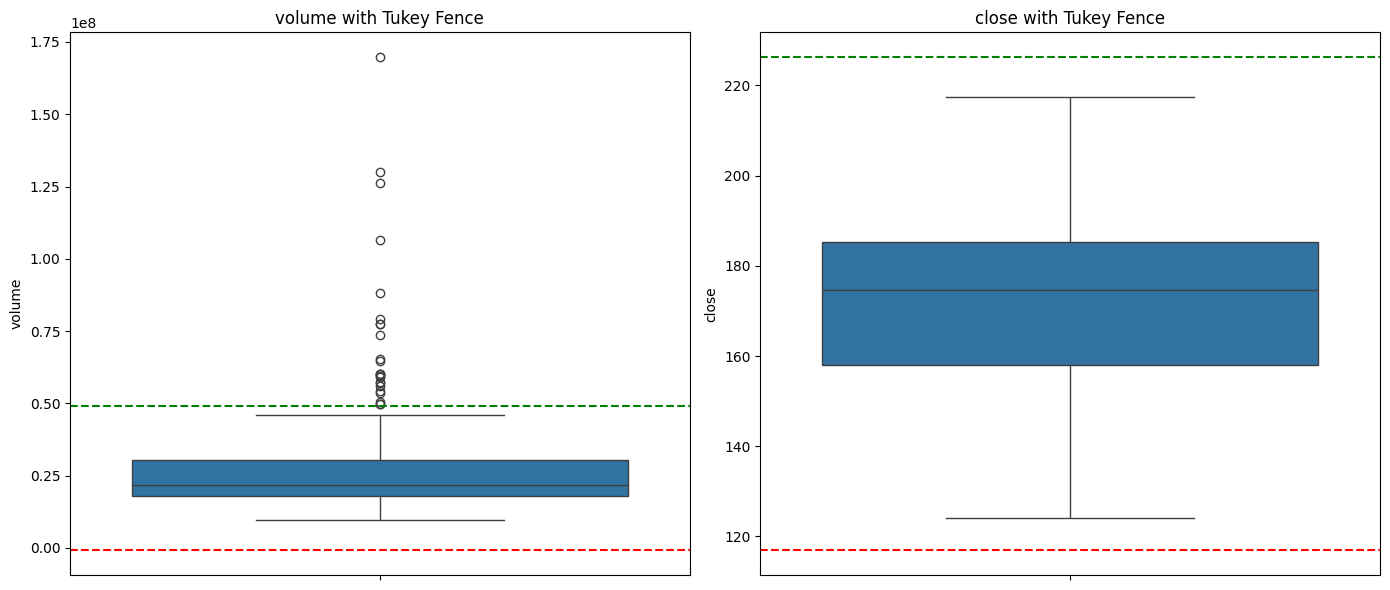

In [ ]:
# 2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

import numpy as np

fb = pd.read_csv("fb_stock_prices_2018.csv", index_col='date', parse_dates=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, col in enumerate(['volume', 'close']):
    q1 = fb[col].quantile(0.25)
    q3 = fb[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    sns.boxplot(y=fb[col], ax=axes[i])
    axes[i].axhline(lower, color='red', linestyle='--')
    axes[i].axhline(upper, color='green', linestyle='--')
    axes[i].set_title(f'{col} with Tukey Fence')

plt.tight_layout()

Text(0.5, 1.0, 'Facebook Close Price with Filled Tukey Range')

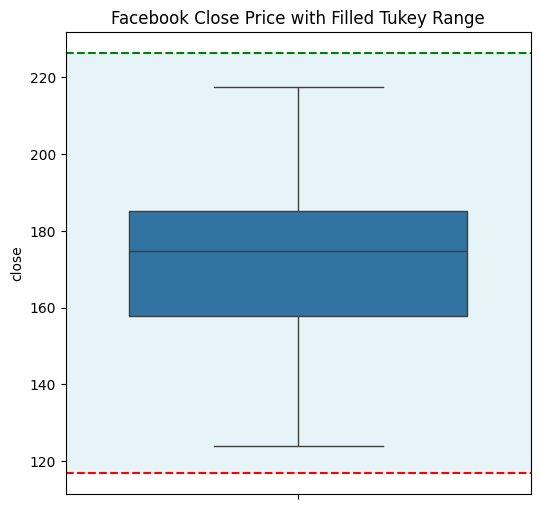

In [ ]:
# 3. Fill in the area between the bounds in the plot from exercise #2.

fig, ax = plt.subplots(figsize=(6, 6))

col = 'close'
q1 = fb[col].quantile(0.25)
q3 = fb[col].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

sns.boxplot(y=fb[col], ax=ax)
ax.axhline(lower, color='red', linestyle='--')
ax.axhline(upper, color='green', linestyle='--')
ax.fill_betweenx(y=[lower, upper], x1=0, x2=1, color='lightblue', alpha=0.3, transform=ax.get_yaxis_transform())

ax.set_title('Facebook Close Price with Filled Tukey Range')

Text(0.5, 1.0, 'Facebook Closing Price with Decline Period Highlighted')

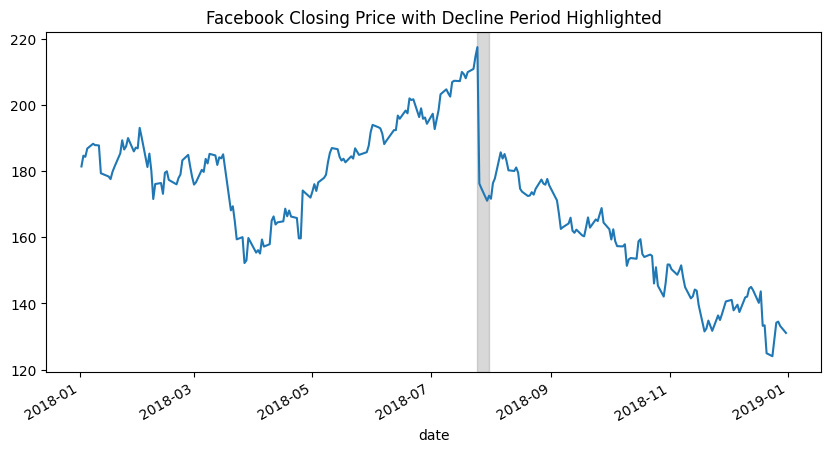

In [ ]:
# 4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

fig, ax = plt.subplots(figsize=(10, 5))

fb['close'].plot(ax=ax)
ax.axvspan(pd.to_datetime('2018-07-25'), pd.to_datetime('2018-07-31'), color='gray', alpha=0.3)
ax.set_title("Facebook Closing Price with Decline Period Highlighted")

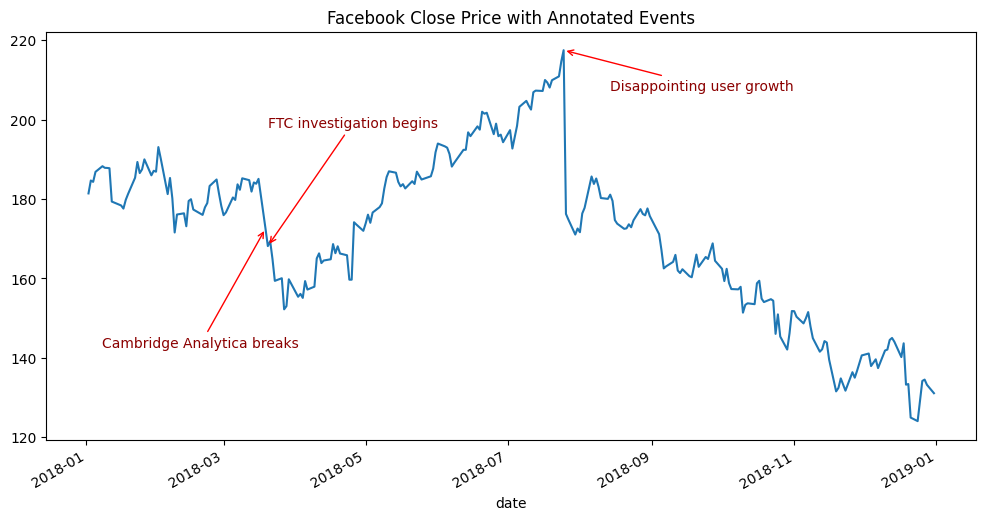

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

fb['close'].plot(ax=ax)
events = {
      # Disappointing user growth announced after close on July 25, 2018
    '2018-07-25': 'Disappointing user growth',
      # Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
    '2018-03-19': 'Cambridge Analytica breaks',
      # FTC launches investigation on March 20, 2018
    '2018-03-20': 'FTC investigation begins'
}

# Define (x, y) offset for each annotation to get diagonal arrows
offsets = [
    (20, -10),  # Left-up
    (-70, -30),   # Right-up
    (0, 30)  # Left-down
]

for (date, label), (dx, dy) in zip(events.items(), offsets):
    x = pd.to_datetime(date)
    y = fb.loc[date, 'close']

    ax.annotate(label,
                xy=(x, y),
                xytext=(x + pd.Timedelta(days=dx), y + dy),
                arrowprops=dict(arrowstyle="->", color='red'),
                fontsize=10,
                color='darkred')

ax.set_title("Facebook Close Price with Annotated Events")
plt.show()


<ipython-input-71-2a328fff8604>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(unique_groups))  # Use qualitative colormap


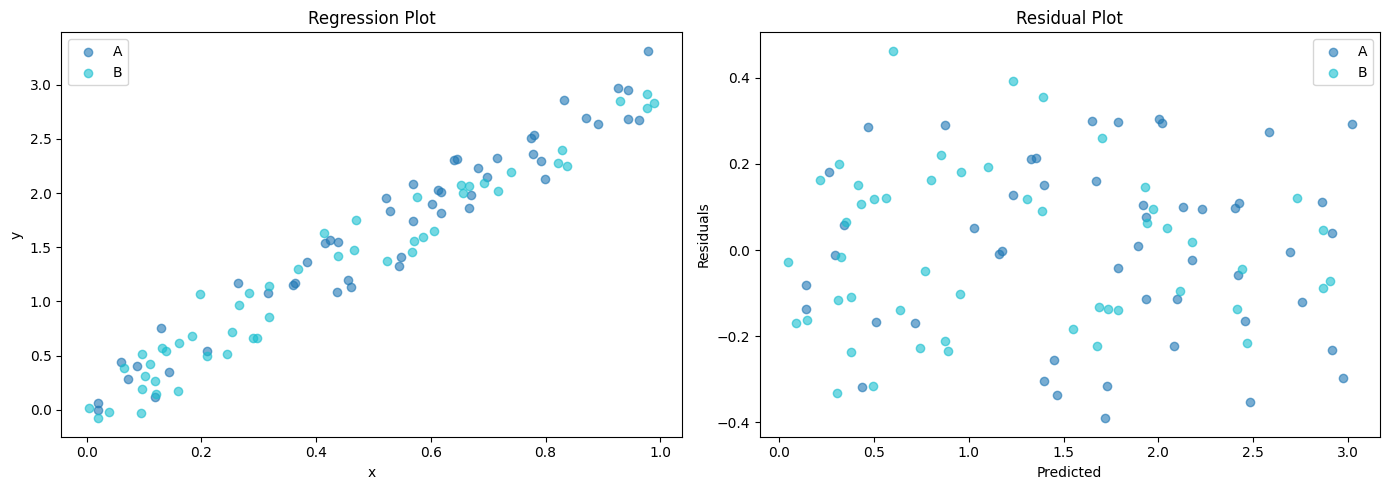

In [ ]:
# 6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

from matplotlib.colors import to_rgba
import matplotlib.cm as cm

def reg_resid_plots(x, y, group=None):
    import statsmodels.api as sm

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    if group is None:
        group = ['All'] * len(x)

    unique_groups = list(pd.Series(group).unique())
    cmap = cm.get_cmap('tab10', len(unique_groups))  # Use qualitative colormap

    for i, grp in enumerate(unique_groups):
        mask = (pd.Series(group) == grp)
        x_vals = x[mask]
        y_vals = y[mask]

        axs[0].scatter(x_vals, y_vals, color=cmap(i), label=str(grp), alpha=0.6)

        X_sm = sm.add_constant(x_vals)
        model = sm.OLS(y_vals, X_sm).fit()
        pred_vals = model.predict(X_sm)

        axs[1].scatter(pred_vals, model.resid, color=cmap(i), label=str(grp), alpha=0.6)

    axs[0].set_title('Regression Plot')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[1].set_title('Residual Plot')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Residuals')
    for ax in axs:
        ax.legend()

    plt.tight_layout()

# Random test data
np.random.seed(0)
x = pd.Series(np.random.rand(100))
y = 3 * x + np.random.normal(0, 0.2, size=100)
group = ['A' if i < 50 else 'B' for i in range(100)]

reg_resid_plots(x, y, group)
